In [1]:
from lmfit import Parameters
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.signal import wiener, filtfilt, butter, gaussian, freqz
from scipy.ndimage import filters
from core.util.units import compute_dft

In [2]:
def poissonian_testing():
    start=0
    stop=30
    mu=8
    num_points=1000
    x = np.array(np.linspace(start, stop, num_points))
    mod, params = fitlogic.make_poissonian_model()
    print('Parameters of the model',mod.param_names)

    p=Parameters()
    p.add('mu',value=mu)
    p.add('amplitude',value=200.)

    data_noisy=(mod.eval(x=x,params=p) *
                np.array((1+0.001*np.random.normal(size=x.shape) *
                p['amplitude'].value ) ) )

    print('all int',all(isinstance(item, (np.int32,int, np.int64)) for item in x))
    print('int',isinstance(x[1], int),float(x[1]).is_integer())
    print(type(x[1]))
    #make the filter an extra function shared and usable for other functions
    gaus=gaussian(10,10)
    data_smooth = filters.convolve1d(data_noisy, gaus/gaus.sum(),mode='mirror')


    result = fitlogic.make_poissonian_fit(x, data_noisy, estimator=fitlogic.estimate_poissonian)
    print(result.fit_report())

    plt.figure()
    plt.plot(x, data_noisy, '-b', label='noisy data')
    plt.plot(x, data_smooth, '-g', label='smoothed data')
    plt.plot(x,result.init_fit,'-y', label='initial values')
    plt.plot(x,result.best_fit,'-r',linewidth=2.0, label='fit')
    plt.xlabel('counts')
    plt.ylabel('occurences')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

Parameters of the model ['amplitude', 'mu']
all int False
int False False
<class 'numpy.float64'>
[[Model]]
    (Model(amplitude_function) * Model(poisson_function))
[[Fit Statistics]]
    # function evals   = 12
    # data points      = 1000
    # variables        = 2
    chi-square         = 5767.011
    reduced chi-square = 5.779
    Akaike info crit   = 1756.154
    Bayesian info crit = 1765.969
[[Variables]]
    amplitude:   203.938825 +/- 1.326897 (0.65%) (init= 225.7002)
    mu:          8.06389684 +/- 0.025915 (0.32%) (init= 7.897898)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, mu)             =  0.126 



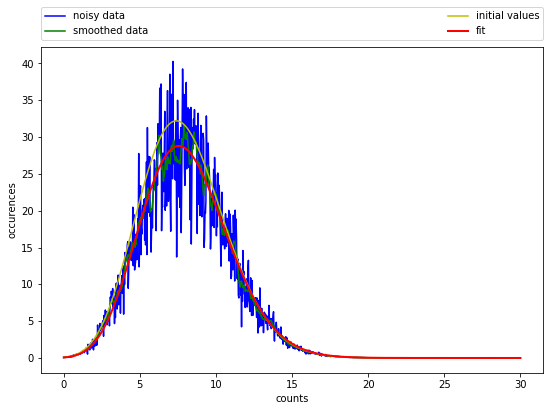

In [3]:
poissonian_testing()

In [4]:
def double_poissonian_testing():
    """ Testing of double poissonian with self created data.
    First version of double poissonian fit."""

    start=100
    stop=300
    num_points=int((stop-start)+1)*100
    x = np.linspace(start, stop, num_points)

    # double poissonian
    mod,params = fitlogic.make_poissoniandouble_model()
    print('Parameters of the model',mod.param_names)
    parameter=Parameters()
    parameter.add('p0_mu',value=200)
    parameter.add('p1_mu',value=240)
    parameter.add('p0_amplitude',value=1)
    parameter.add('p1_amplitude',value=1)
    data_noisy = ( np.array(mod.eval(x=x,params=parameter)) *
                   np.array((1+0.2*np.random.normal(size=x.shape) )*
                   parameter['p1_amplitude'].value) )


    #make the filter an extra function shared and usable for other functions
    gaus=gaussian(10,10)
    data_smooth = filters.convolve1d(data_noisy, gaus/gaus.sum(),mode='mirror')

    result = fitlogic.make_poissoniandouble_fit(x, data_noisy, estimator=fitlogic.estimate_poissoniandouble)
    print(result.fit_report())

    plt.figure()
    plt.plot(x, data_noisy, '-b', label='noisy data')
    plt.plot(x, data_smooth, '-g', label='smoothed data')
    plt.plot(x,result.init_fit,'-y', label='initial values')
    plt.plot(x,result.best_fit,'-r',linewidth=2.0, label='fit')
    plt.xlabel('counts')
    plt.ylabel('occurences')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

Parameters of the model ['p0_amplitude', 'p0_mu', 'p1_amplitude', 'p1_mu']
[[Model]]
    ((Model(amplitude_function, prefix='p0_') * Model(poisson_function, prefix='p0_')) + (Model(amplitude_function, prefix='p1_') * Model(poisson_function, prefix='p1_')))
[[Fit Statistics]]
    # function evals   = 34
    # data points      = 20100
    # variables        = 4
    chi-square         = 0.178
    reduced chi-square = 0.000
    Akaike info crit   = -233841.166
    Bayesian info crit = -233809.532
[[Variables]]
    p0_amplitude:   0.99584404 +/- 0.002318 (0.23%) (init= 1.228433)
    p0_mu:          200.038104 +/- 0.051022 (0.03%) (init= 199.9851)
    p1_amplitude:   1.00529078 +/- 0.002397 (0.24%) (init= 0.3601585)
    p1_mu:          240.057738 +/- 0.057952 (0.02%) (init= 264.1475)
[[Correlations]] (unreported correlations are <  0.100)
    C(p0_mu, p1_mu)              =  0.491 
    C(p0_amplitude, p1_mu)       =  0.388 
    C(p0_mu, p1_amplitude)       = -0.367 
    C(p0_amplitude, p0_mu)

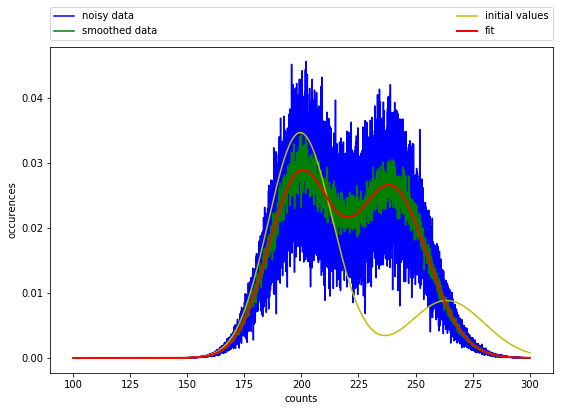

In [5]:
double_poissonian_testing()